In [1]:


import matplotlib.pyplot as plt
import colour as clr
import time

import sys, os
sys.path.append(os.getcwd())
cwd = os.getcwd()
sys.path.append(cwd.rsplit('/', 1)[0])
import ReachingModels as reaching
import numpy as np
import matplotlib.pyplot as plt
import colour as clr
import time
import plotpresentlib as pp
loopValuation = [1,2,3]
color1 = clr.Color("#e0f3db")
colors = list(color1.range_to(clr.Color("#084081"),3))

sim = reaching.DoublePendulum()
%config InlineBackend.figure_formats = ['svg']

#set
tstart = time.time()
prevSol = []
dGuess = 1.0
optiLow = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0, 
  theN              = 200,
  discreteOrCont='discrete',
  theDuration=.5)  

xystart = np.array([-.10,0.2])

trajNominal, optiNominal = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-3)

trajLowFR, optiLowFR = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-7)

trajHighFR, optiHighFR = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e2)


Leaving duration at setup: 0.5 s.

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     9826
Number of nonzeros in inequality constraint Jacobian.:     4221
Number of nonzeros in Lagrangian Hessian.............:     3203

Total number of variables............................:     3618
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bou

SystemError: <built-in function Opti_value> returned a result with an error set

 939  1.3851016e+00 1.78e-15 8.81e-06  -8.6 1.58e-07   1.7 1.00e+00 1.00e+00h  1

Number of Iterations....: 939

                                   (scaled)                 (unscaled)
Objective...............:   1.3851015638322024e+00    1.3851015638322024e+00
Dual infeasibility......:   8.8111580335213337e-06    8.8111580335213337e-06
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Complementarity.........:   2.5059035596800626e-09    2.5059035596800626e-09
Overall NLP error.......:   8.8111580335213337e-06    8.8111580335213337e-06


Number of objective function evaluations             = 1221
Number of objective gradient evaluations             = 940
Number of equality constraint evaluations            = 1221
Number of inequality constraint evaluations          = 1221
Number of equality constraint Jacobian evaluations   = 952
Number of inequality constraint Jacobian evaluations = 952
Number of Lagrangian Hessian evaluations             = 939
Total CPU sec

intermediate_callback: Error in Function::operator() for 'InternalOptiCallback' [InternalOptiCallback] at .../casadi/core/function.cpp:1368:
.../casadi/core/function_internal.cpp:3366: Failed to evaluate 'eval_dm' for InternalOptiCallback:
.../casadi/build/swig/casadiPYTHON_wrap.cxx:3799: <built-in function Opti_value> returned a result with an error set


   1  5.1125555e-01 1.72e+03 1.07e+00  -1.0 1.79e+03    -  2.74e-02 3.94e-02f  1
   2  7.7534548e-01 7.40e+02 1.35e+02  -1.0 1.72e+03    -  8.84e-02 5.70e-01f  1
   3  8.6156251e-01 5.99e+02 1.05e+02  -1.0 7.40e+02    -  1.64e-02 1.91e-01f  1
   4  9.2566228e-01 4.72e+02 7.86e+01  -1.0 5.99e+02    -  8.52e-03 2.12e-01f  1
   5  9.2566446e-01 4.72e+02 7.86e+01  -1.0 4.72e+02   2.9 1.49e-03 5.03e-05h  1
   6  9.2566919e-01 4.72e+02 3.10e+02  -1.0 4.72e+02   3.3 1.74e-03 1.11e-04h  1
   7  9.2568299e-01 4.72e+02 4.00e+02  -1.0 4.72e+02   2.8 1.79e-03 3.17e-04h  1
   8  9.2324567e-01 4.71e+02 3.98e+02  -1.0 6.82e+03    -  3.68e-03 6.06e-04f  1
   9  9.2325536e-01 4.71e+02 4.27e+02  -1.0 4.71e+02   3.3 2.63e-05 2.27e-04h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  9.2327529e-01 4.71e+02 5.57e+02  -1.0 4.71e+02   2.8 3.89e-04 4.49e-04h  1
  11  9.2331563e-01 4.71e+02 6.30e+02  -1.0 4.71e+02   2.3 1.28e-03 7.61e-04h  1
  12  9.2352307e-01 4.69e+02

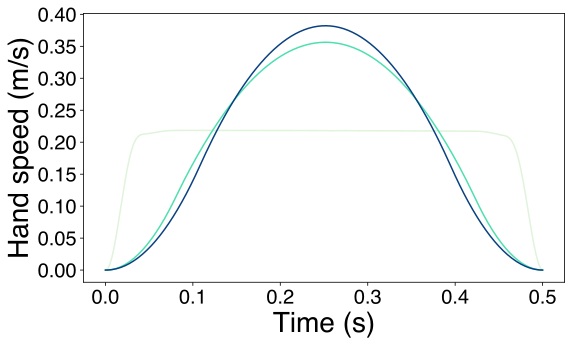

In [ ]:
fig,ax = plt.subplots()

ax.plot(trajLowFR.time, trajLowFR.handspeed,color=colors[0].get_hex())
ax.plot(trajNominal.time, trajNominal.handspeed,color=colors[1].get_hex())
ax.plot(trajHighFR.time, trajHighFR.handspeed,color=colors[2].get_hex())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyTalk(plt.gca())
plt.savefig("inspectionTime.pdf")

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

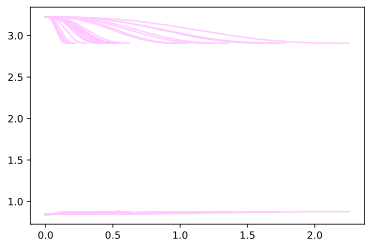

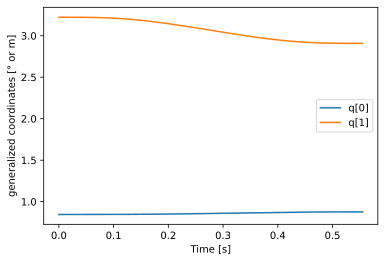

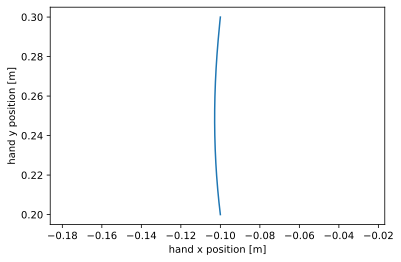

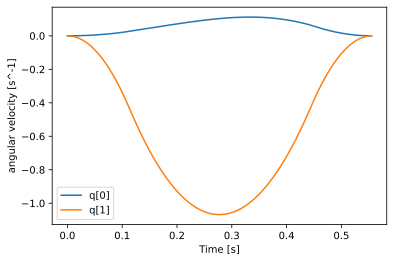

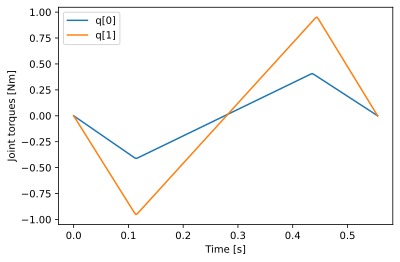

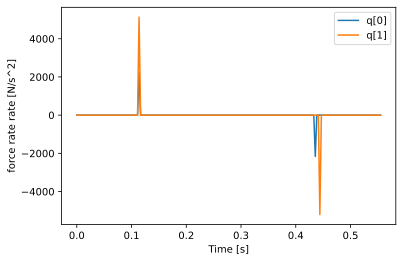

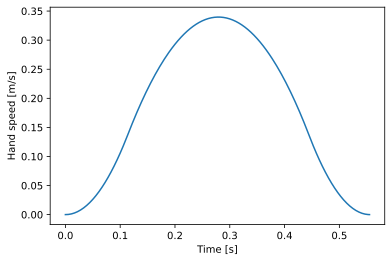

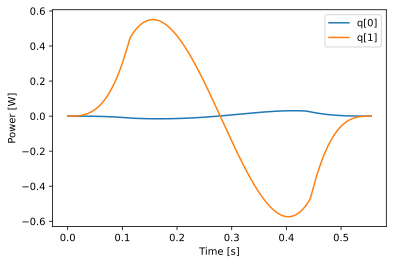

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

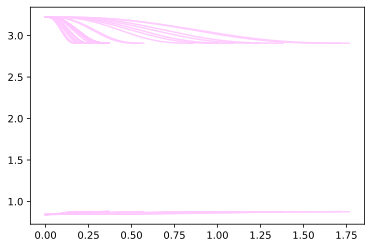

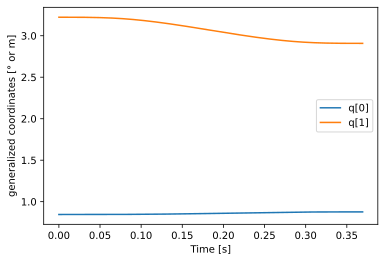

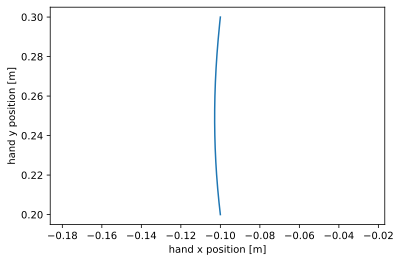

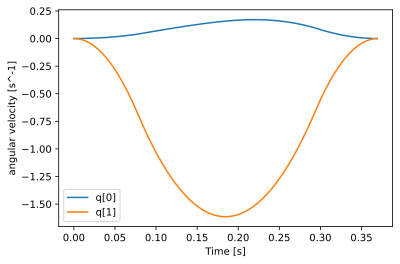

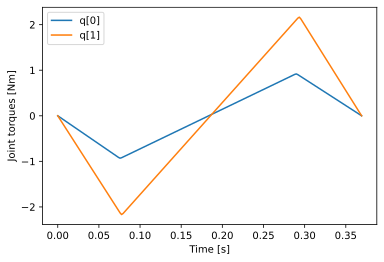

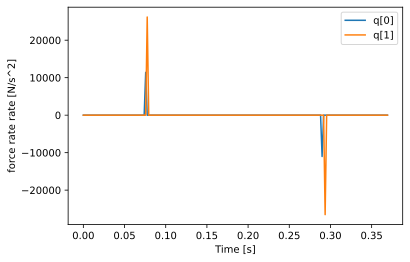

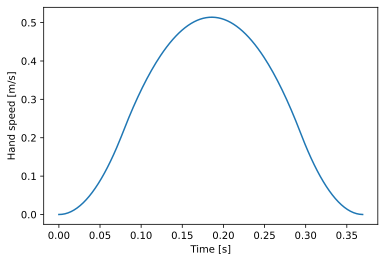

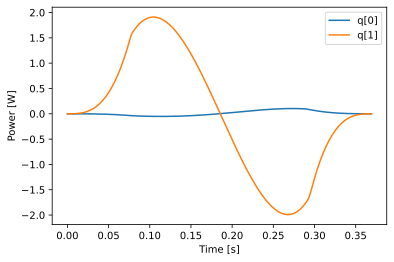

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

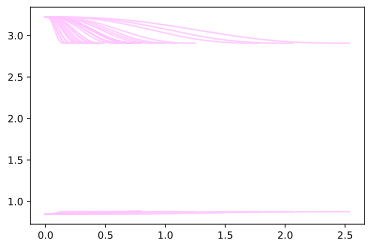

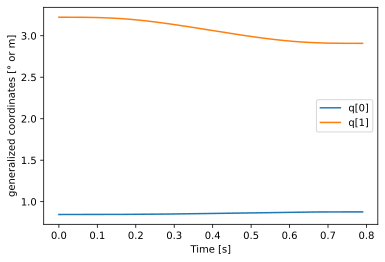

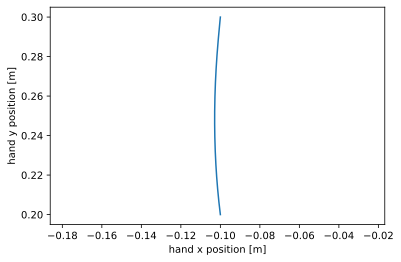

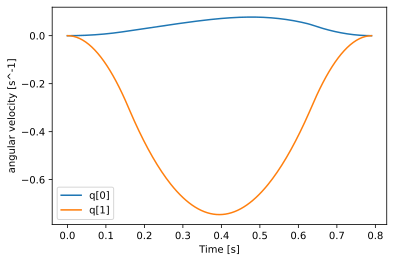

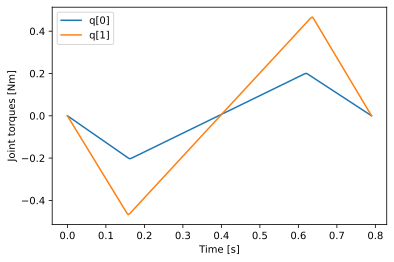

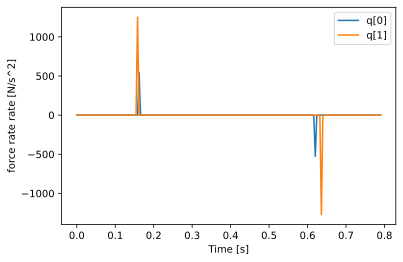

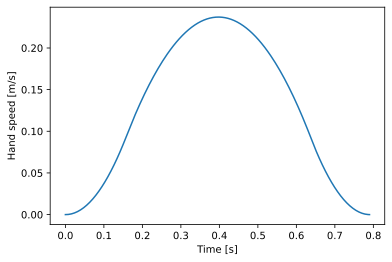

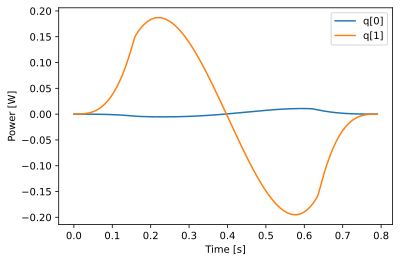

In [ ]:
tstart = time.time()
prevSol = []
dGuess = 1.0
problem = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0, 
  theN              = 200,
  discreteOrCont='discrete')  

trajNominalTime, optiNominalTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 20,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)

trajHighTime, optiHighTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 100,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)

trajLowTime, optiLowTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 5,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)


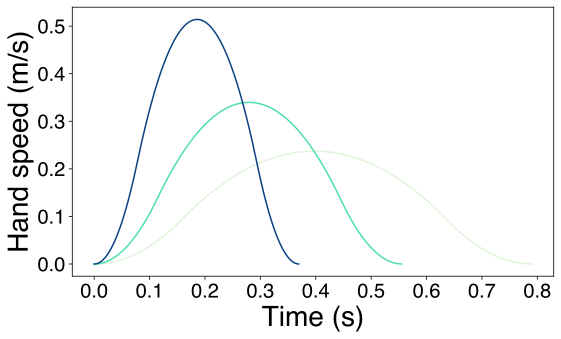

In [ ]:
fig,ax = plt.subplots()

ax.plot(trajLowTime.time,     trajLowTime.handspeed,color=colors[0].get_hex())
ax.plot(trajNominalTime.time, trajNominalTime.handspeed,color=colors[1].get_hex())
ax.plot(trajHighTime.time,    trajHighTime.handspeed,color=colors[2].get_hex())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyTalk(plt.gca())
plt.savefig("inspectionTimeValuation.pdf")